# t-ETE Plots of Tissues 

Exploratory dimensionality reduction plots of TCGA and GTEx tissues 


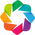

In [161]:
import holoviews as hv
import pandas as pd 
import numpy as np

from tete import tete

from rnaseq_lib.utils import mkdir_p
from rnaseq_lib.de import get_l2fc
from rnaseq_lib.utils.tissues import return_samples

hv.extension('bokeh')

Collect tissues

In [4]:
samples = return_samples()

Read in DESeq2 normalized expression matrix

In [9]:
df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)

In [13]:
df.head()

,TCGA-AD-5900-01,TCGA-BP-4968-01,TCGA-NG-A4VU-01,TCGA-CG-4305-01,TCGA-AO-A03M-01,TCGA-ZH-A8Y6-01,TCGA-HT-7686-01,TCGA-BR-6458-11,TCGA-29-1699-01,TCGA-KK-A6E1-01,...,GTEX-ZUA1-0226-SM-5NQ9Q,GTEX-Q734-0526-SM-2I3EH,GTEX-Y5V6-0526-SM-4VBRV,GTEX-1192X-3126-SM-5N9BY,GTEX-13X6H-0526-SM-5LU4Q,K-562-SM-3MJHH,GTEX-11GSO-2326-SM-5A5LX,GTEX-YJ8A-1126-SM-5IFJU,GTEX-RU1J-0226-SM-2TF5Y,GTEX-12BJ1-0426-SM-5FQSO
ENSG00000116032.5,4.381288,1.511815,1.430657,0.986667,1.945771,0.903716,0.000000,0.000000,8.441424,3.926956,...,14.301939,77.979912,15.608325,8.313450,31.846108,15.292863,14.530338,17.417563,17.747865,17.676720
ENSG00000171174.13,87.625753,656.631497,133.766402,154.413440,128.420862,232.255080,128.729659,154.710834,341.643175,244.453014,...,150.170357,172.455574,272.625414,137.765738,130.569042,16.822149,61.350314,592.197153,133.108991,229.797358
ENSG00000149136.7,7932.321326,4682.089977,7258.436790,3999.949436,5836.533582,2959.670762,8468.201070,3971.274572,6338.336754,8266.242476,...,5958.545231,6014.950501,4380.736621,3552.218287,6362.852322,8834.176959,4249.316508,6886.904540,5096.595360,6787.860414
ENSG00000078237.5,196.062623,330.583471,273.255431,533.787036,200.025221,212.373322,576.032718,278.915306,336.719011,295.503442,...,294.977487,245.936645,339.220935,263.655119,128.976736,29.566201,416.536345,404.087469,221.848318,203.282278
ENSG00000146083.11,1343.412332,2331.722131,2469.313472,1886.014639,1978.459577,2124.185077,1780.760286,2426.345260,5307.076163,2677.202284,...,3019.496818,3705.545422,2409.925419,2769.566381,3585.871729,2052.811922,2504.061513,4756.736545,3531.825224,3517.667246


# Create Scatter Objects 

In [ ]:
plots = {}
for tissue in sorted(samples):
    print tissue
    # Subset dataframe by samples in tissue
    sub = df[samples[tissue]]
    # Create list of labels for samples
    labels = ['Tumor' if x.endswith('-01') 
              else 'Normal' if x.endswith('-11') 
              else 'GTEx' for x in samples[tissue]]
    
    # Run t-ETE on transpose so genes are features
    z = tete(np.array(sub.T), num_dims=2, num_neighbs=20)
    
    # Create plotting dataframe for 
    plot = pd.DataFrame()
    plot['sample'] = samples[tissue]
    plot['tissue'] = [tissue for _ in samples[tissue]]
    plot['label'] = labels
    plot['x'] = z[:, 0]
    plot['y'] = z[:, 1]
    
    # Create holoviews scatter object
    scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'label', 'sample'], group=tissue)
    plots[tissue] = scatter

In [228]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Adrenal']

:Scatter   [x]   (y,label,sample)

In [225]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Bladder']

:Scatter   [x]   (y,label)

In [209]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Brain']

:Scatter   [x]   (y,label)

In [210]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Breast']

:Scatter   [x]   (y,label)

In [211]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Cervix']

:Scatter   [x]   (y,label)

In [212]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Colon-Small_intestine']

:Scatter   [x]   (y,label)

In [213]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Esophagus']

:Scatter   [x]   (y,label)

In [214]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Kidney']

:Scatter   [x]   (y,label)

In [215]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Liver']

:Scatter   [x]   (y,label)

In [216]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Lung']

:Scatter   [x]   (y,label)

In [217]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Ovary']

:Scatter   [x]   (y,label)

In [218]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Pancreas']

:Scatter   [x]   (y,label)

In [219]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Prostate']

:Scatter   [x]   (y,label)

In [220]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Skin-Head']

:Scatter   [x]   (y,label)

In [221]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Stomach']

:Scatter   [x]   (y,label)

In [222]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Testis']

:Scatter   [x]   (y,label)

In [223]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Thyroid']

:Scatter   [x]   (y,label)

In [224]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
plots['Uterus']

:Scatter   [x]   (y,label)